In [1]:
import sys,os
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import mercury as mr

import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import ggplot, aes, facet_grid, labs, geom_point, geom_line, theme, element_blank

## my own libs
extra_path = "/Users/rbansal/src/election_metrics/lib" # whatever it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

from india_data import *
from indices import *
from plot_metrics import *


In [7]:
## lets load some data!!!                                                                                                                                                                  

election_data = "/Users/rbansal/src/election_metrics/data/"
us_pres_df = read_us_data(election_data)
india_loksabha_df = read_india_data(election_data)

## run the calculations
india_outputs = calc_indices_india(india_loksabha_df)
us_outputs = calc_indices_us(us_pres_df)

def plot_measure(measure, india_outputs, us_outputs):
    if measure == "Gallagher":
        g1 = plot_gallagher(india_outputs, us_outputs)
    elif measure == "HHI: PC-Seats/Electors":
        g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['seats']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['electors']}), 
         "US/India: Natl. Election HHI for Seats/Electors", measure='hhi')
    elif measure == "HHI: Popular Vote":
        g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['total_votes']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['total_votes']}), 
         "US/India: Natl. Election HHI for Total Votes", measure='hhi')
    elif measure == "ENP: PC-Seats/Electors":
        g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['seats']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['electors']}), 
        "US/India: Natl. Election ENP for Electors/Seats", measure="enp")
        pass
    elif measure == "ENP: Popular Vote":
        g1 = plot_duo(pd.DataFrame({'year': india_outputs['measures']['year'],**india_outputs['measures']['total_votes']}), 
         pd.DataFrame({'year': us_outputs['measures']['year'],**us_outputs['measures']['total_votes']}), 
         "US/India: Natl. Election HHI for Total Votes", measure='enp')
        pass
    else:
        print("Unknow")
    return (g1)



 bhavnani_df: (73081, 13)
 kaggle_2019_df: (2263, 20)
 ls_df: (75344, 9)


******Fixing State names****



States/UTs:
['andaman & nicobar islands' 'andhra pradesh' 'arunachal pradesh' 'assam'
 'bihar' 'chandigarh' 'chattisgarh' 'goa et al' 'nct delhi' 'gujarat'
 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand' 'karnataka'
 'kerala' 'lakshadweep' 'madhya pradesh' 'maharashtra' 'manipur'
 'meghalaya' 'mizoram' 'nagaland' 'odisha' 'puducherry' 'punjab'
 'rajasthan' 'sikkim' 'tamil nadu' 'tripura' 'uttar pradesh' 'uttarakhand'
 'west bengal' 'telangana']

Num states: 34


******Fixing PC names****.....


In [8]:
app = mr.App(title="Electoral Metrics", description="Electoral Metrics for India and US")


mercury.App

In [9]:
measure = mr.Select(label="Please select Electoral Metric", value="Gallagher", 
                   choices=["Gallagher", "HHI: PC-Seats/Electors", "HHI: Popular Vote", "ENP: PC-Seats/Electors", "ENP: Popular Vote"
                            ])


mercury.Select

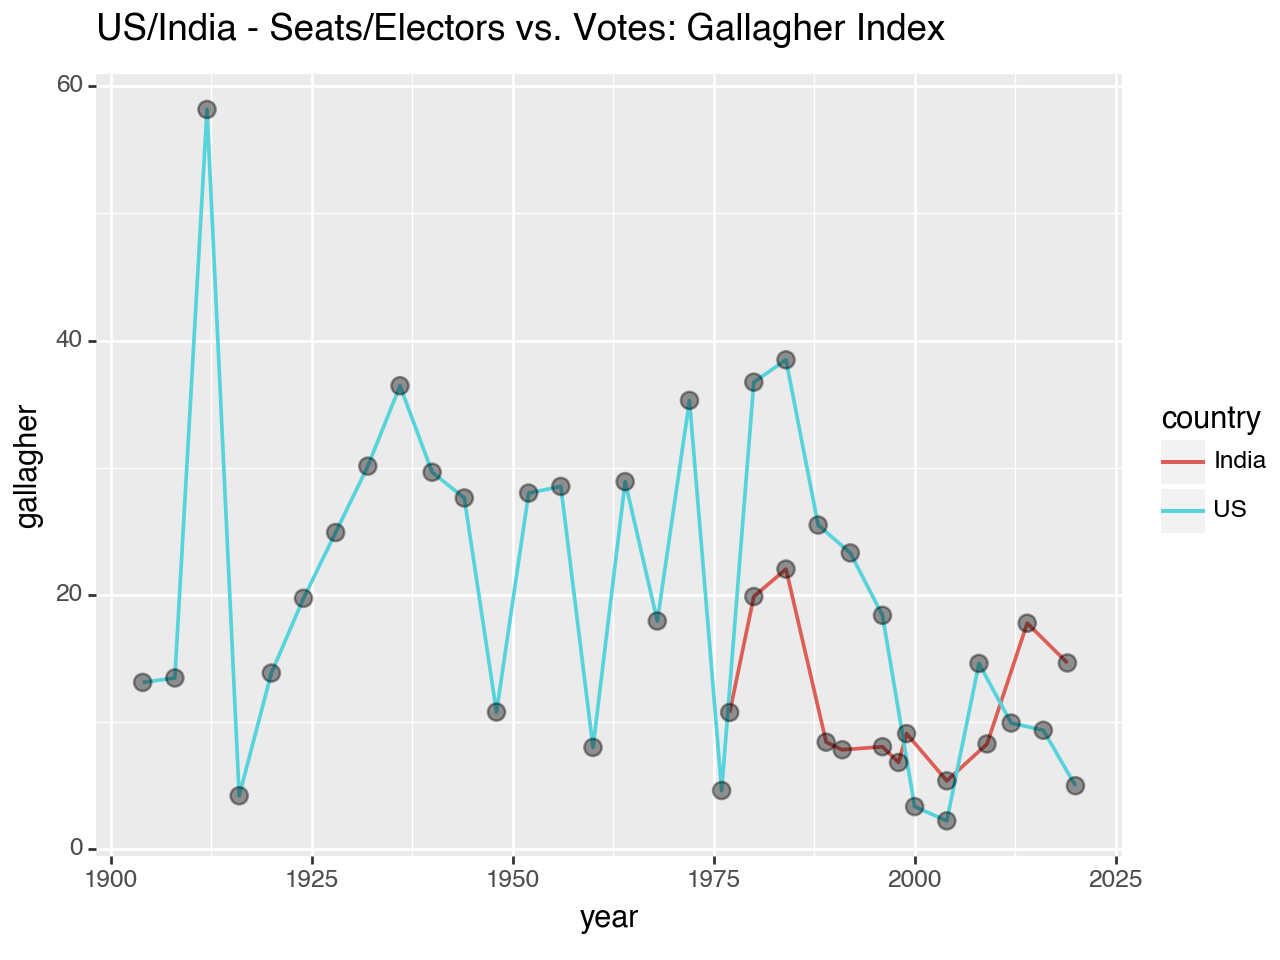

In [10]:
g1 = plot_measure(india_outputs=india_outputs,
             us_outputs=us_outputs,
             measure=measure.value)

print(g1)